In [2]:
import os
import cv2
import random
import math
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/Users/vedantpadole/Desktop/Research/finalized')

all_classes = os.listdir('/Users/vedantpadole/Desktop/Research/finalized')
print (all_classes)  
len(all_classes)

['your', 'ready', 'safe', 'order', 'fork', 'repeat', 'sandwich', 'biscuit', 'please', 'wait', 'sugar', 'cup', '.DS_Store', 'sweet', 'ac', 'refill', 'lettuce', 'bill', 'thank-you', 'water', 'no', 'vegetables', 'dessert', 'pop corn', 'would', 'bitter', 'milk', 'enjoy', 'cash', 'allergy', 'pepsi', 'coca-cola', 'is', 'spicy', 'nacho', 'cost', 'fresh', 'ice cream', 'chair', 'cheese', 'napkin', 'good night', 'mayonnaise', 'about', 'brownie', 'soda', 'bye', 'coupon', 'small', 'mustard', 'urgent', 'credit card', 'french fries', 'ketchup', 'you_ll', 'manager', 'salt', 'eat', 'total', 'receipt', 'juicy', 'cold', 'extra', 'lid', 'yogurt', 'warm', 'menu', 'ingredients', 'burger', 'alcohol', 'relish', 'eggs', 'chicken', 'hot', 'what', 'tissues', 'pickle', 'spoon', 'bread', 'additional', 'hello', 'straw', 'sauce', 'lactose', 'bag', 'drive', 'pizza', 'bacon', 'pepper', 'tomato', 'sorry', 'coke', 'drink', 'which', 'gluten free', 'I_ve', 'cake', 'barbecue']


98

In [6]:
plt.figure(figsize=(20,20))
random_range=random.sample(range(len(all_classes)),1)
for counter,random_index in enumerate(random_range,1):
  selected_Class=all_classes[random_index]
  video_files_names_list=os.listdir(f'/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET/{selected_Class}')
  selected_video_file_name=random.choice(video_files_names_list)
  video_reader=cv2.VideoCapture(f'/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET/{selected_Class}/{selected_video_file_name}')
  _,bgr_frame=video_reader.read()
  rgb_frame=cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
  cv2.putText(rgb_frame,selected_Class,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
  plt.subplot(11,2,counter);plt.imshow(rgb_frame);plt.axis('off')

In [3]:
IMAGE_HEIGHT,IMAGE_WIDTH=128,128
SEQUENCE_LENGTH=10
DATASET='/Users/vedantpadole/Desktop/Research/finalized'
CLASSES_LIST=all_classes

In [4]:
def frames_extraction(video_path):
  frames_list=[]
  video_reader=cv2.VideoCapture(video_path)
  video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)
  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)
    success,frame=video_reader.read()
    if not success:
      break
    resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
    normalized_frame=resized_frame/255
    frames_list.append(normalized_frame)
  video_reader.release()
  return frames_list

In [5]:
def create_dataset():
  features=[]
  labels=[]
  video_files_path=[]
  for class_index,class_name in enumerate(CLASSES_LIST):
    print(f'Extracting the data of class:  {class_name}')
    files_list=os.listdir(os.path.join(DATASET,class_name))
    for file_name in files_list:
      video_file_path=os.path.join(DATASET,class_name,file_name)
      frames=frames_extraction(video_file_path)
      if len(frames)==SEQUENCE_LENGTH:
        features.append(frames)
        labels.append(class_index)
        video_files_path.append(video_file_path)
  features=np.asarray(features)
  labels=np.array(labels)
  return features,labels,video_files_path

In [6]:
features,labels,video_files_path=create_dataset()

Extracting the data of class:  your
Extracting the data of class:  ready
Extracting the data of class:  safe
Extracting the data of class:  order
Extracting the data of class:  fork
Extracting the data of class:  repeat
Extracting the data of class:  sandwich
Extracting the data of class:  biscuit
Extracting the data of class:  please
Extracting the data of class:  wait
Extracting the data of class:  sugar
Extracting the data of class:  cup
Extracting the data of class:  sweet
Extracting the data of class:  ac
Extracting the data of class:  refill
Extracting the data of class:  lettuce
Extracting the data of class:  bill
Extracting the data of class:  thank-you
Extracting the data of class:  water
Extracting the data of class:  no
Extracting the data of class:  vegetables
Extracting the data of class:  dessert
Extracting the data of class:  pop corn
Extracting the data of class:  would
Extracting the data of class:  bitter
Extracting the data of class:  milk
Extracting the data of clas

In [7]:
from keras.utils import to_categorical
one_hot_encoded_labels=to_categorical(labels)

In [8]:
seed_constant=27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [9]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,one_hot_encoded_labels,test_size=0.2,shuffle=True,random_state=seed_constant)

In [14]:
a=features_train.shape[0]

In [15]:
from keras import Sequential
from keras.layers import ConvLSTM2D,MaxPooling3D,TimeDistributed,Dropout,Flatten,Dense
def create_convlstm_model():
  model=Sequential()
  model.add(ConvLSTM2D(filters=4,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=14,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=16,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(Flatten())
  model.add(Dense(len(CLASSES_LIST),activation='softmax'))
  model.summary()
  return model

In [16]:
model1=create_convlstm_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 10, 126, 126, 4)   1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 63, 63, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 10, 63, 63, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 10, 61, 61, 14)    9128      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 10, 31, 31, 14)   0         
 3D)                                                             
                                                        

In [17]:
pip install pydot


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install graphviz


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from keras.utils import plot_model
plot_model(model1,to_file='model1.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
from keras.callbacks import EarlyStopping
early_stopping_call=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
r=model1.fit(x=features_train,y=labels_train,epochs=15,batch_size=32,shuffle=True,validation_split=0.2,callbacks=[early_stopping_call])

Epoch 1/15
40/40 [==============================] - 720s 18s/step - loss: 0.5567 - accuracy: 0.8624 - val_loss: 1.0718 - val_accuracy: 0.8156
Epoch 2/15
40/40 [==============================] - 683s 17s/step - loss: 0.2345 - accuracy: 0.9351 - val_loss: 1.0459 - val_accuracy: 0.7875
Epoch 3/15
40/40 [==============================] - 824s 21s/step - loss: 0.1990 - accuracy: 0.9398 - val_loss: 1.1164 - val_accuracy: 0.8031
Epoch 4/15
40/40 [==============================] - 1245s 31s/step - loss: 0.2981 - accuracy: 0.9109 - val_loss: 1.0746 - val_accuracy: 0.8250
Epoch 5/15
40/40 [==============================] - 1327s 32s/step - loss: 0.2338 - accuracy: 0.9249 - val_loss: 0.9742 - val_accuracy: 0.8406
Epoch 6/15
40/40 [==============================] - 1167s 29s/step - loss: 0.2162 - accuracy: 0.9429 - val_loss: 1.0529 - val_accuracy: 0.8687
Epoch 7/15
40/40 [==============================] - 774s 19s/step - loss: 0.1824 - accuracy: 0.9500 - val_loss: 0.8954 - val_accuracy: 0.8656
Epo

In [22]:
model1.save('finalized_asl.h5')

On Testing data

In [23]:
history=model1.evaluate(features_test,labels_test)

13/13 [==============================] - 44s 3s/step - loss: 0.6848 - accuracy: 0.9000


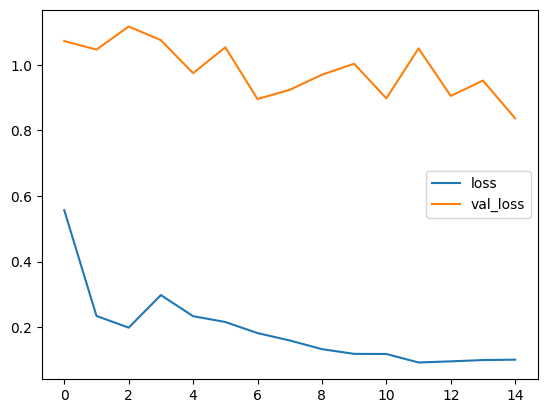

In [26]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

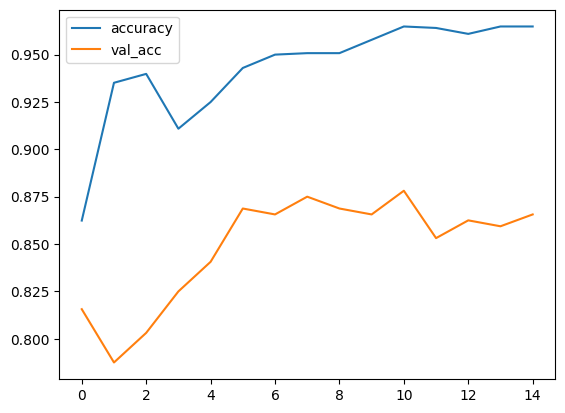

In [27]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [6]:
from collections import deque
predicted_clas=[]

def prediction(video_path,output_directory,SEQUENCE_LENGTH):
    video_reader=cv2.VideoCapture(video_path)
    original_video_width=int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height=int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer=cv2.VideoWriter(output_directory,cv2.VideoWriter_fourcc('M','P','.4','V'),video_reader.get(cv2.CAP_PROP_FPS),(original_video_width,original_video_height))
    frames_queue=deque(maxlen=SEQUENCE_LENGTH)
    predicted_class_name=''
    while video_reader.isOpened():
        ok,frame=video_reader.read()
        if not ok:
            break
        resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
        normalized_frames=resized_frame/255
        frames_queue.append(normalized_frames)
        if len(frames_queue)==SEQUENCE_LENGTH:
            predicted_labels_probabilities=model1.predict(np.expand_dims(frames_queue,axis=0))[0]
            predicted_label=np.argmax(predicted_labels_probabilities)
            predicted_class_name=CLASSES_LIST[predicted_label]
        cv2.putText(frame,predicted_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        predicted_clas.append(predicted_class_name)
        video_writer.write(frame)
    video_reader.release()
    video_writer.release()

In [41]:
prediction('/Users/vedantpadole/Desktop/Research/output_video_path/augmented_video_9_speed.mp4','/Users/vedantpadole/Desktop/Research/output_video_path',SEQUENCE_LENGTH)

1/1 [==============================] - 0s 151ms/step


In [42]:
predicted_clas

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coke',
 'coke',
 'coke',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'coca-cola',
 'co

In [29]:
prediction('/Users/vedantpadole/Desktop/Research/finalized/alcohol/01839_augmented_darkness.mp4','/Users/vedantpadole/Desktop/Research/output_video_path',SEQUENCE_LENGTH)


IndexError: tuple index out of range

In [48]:
predicted_clas

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy']

In [50]:
prediction('/Users/vedantpadole/Desktop/Research/output_video_path/augmented_videos_3_brightness.mp4','/Users/vedantpadole/Desktop/Research/output_video_path',SEQUENCE_LENGTH)


[ERROR:0@14059.995] global cap.cpp:597 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /Users/vedantpadole/Desktop/Research/output_video_path in function 'icvExtractPattern'




1/1 [==============================] - 0s 236ms/step


In [51]:
predicted_clas

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy',
 'allergy']

In [10]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,TimeDistributed,Dropout,Flatten,Dense,LSTM
model=Sequential()
model.add(TimeDistributed(Conv2D(16,(3,3),padding='same',activation='relu'),input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(32,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(128,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64))
model.add(Dense(len(CLASSES_LIST),activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 128, 128, 16)  448      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 64, 64, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 64, 64, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 64, 64, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 32, 32, 32)   0

In [12]:
from keras.callbacks import EarlyStopping
early_stopping_call=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
r=model.fit(x=features_train,y=labels_train,epochs=50,batch_size=32,shuffle=True,validation_split=0.2,callbacks=[early_stopping_call])

Epoch 1/50
40/40 [==============================] - 180s 4s/step - loss: 4.5380 - accuracy: 0.0266 - val_loss: 4.4192 - val_accuracy: 0.0562
Epoch 2/50
40/40 [==============================] - 175s 4s/step - loss: 4.1748 - accuracy: 0.0813 - val_loss: 4.0976 - val_accuracy: 0.1250
Epoch 3/50
40/40 [==============================] - 158s 4s/step - loss: 3.7320 - accuracy: 0.1767 - val_loss: 3.6479 - val_accuracy: 0.2156
Epoch 4/50
40/40 [==============================] - 158s 4s/step - loss: 3.3261 - accuracy: 0.2807 - val_loss: 3.2512 - val_accuracy: 0.2969
Epoch 5/50
40/40 [==============================] - 159s 4s/step - loss: 2.9073 - accuracy: 0.4214 - val_loss: 2.9288 - val_accuracy: 0.4219
Epoch 6/50
40/40 [==============================] - 160s 4s/step - loss: 2.5818 - accuracy: 0.5332 - val_loss: 2.6635 - val_accuracy: 0.4719
Epoch 7/50
40/40 [==============================] - 157s 4s/step - loss: 2.3209 - accuracy: 0.5927 - val_loss: 2.3892 - val_accuracy: 0.5562
Epoch 8/50
40

In [14]:
model.save("LRCN_finalized.h5")

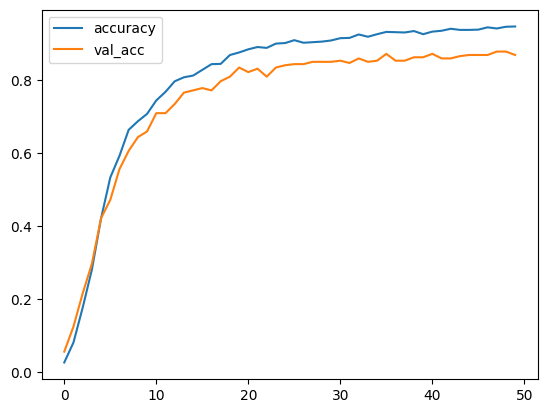

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

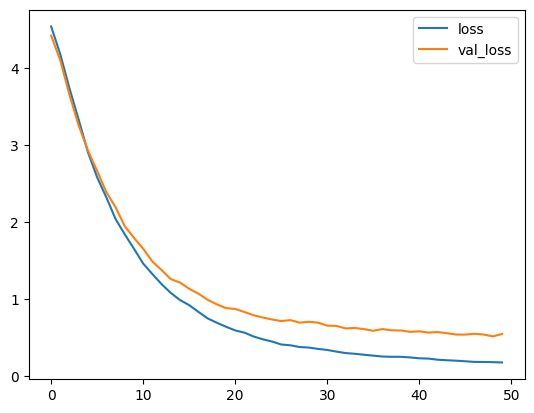

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [24]:
history=model.evaluate(features_test,labels_test)

13/13 [==============================] - 11s 785ms/step - loss: 0.5143 - accuracy: 0.8850


In [7]:
from collections import deque
predicted_clas=[]

def prediction(video_path,output_directory,SEQUENCE_LENGTH):
    video_reader=cv2.VideoCapture(video_path)
    original_video_width=int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height=int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer=cv2.VideoWriter(output_directory,cv2.VideoWriter_fourcc('M','P','.4','V'),video_reader.get(cv2.CAP_PROP_FPS),(original_video_width,original_video_height))
    frames_queue=deque(maxlen=SEQUENCE_LENGTH)
    predicted_class_name=''
    while video_reader.isOpened():
        ok,frame=video_reader.read()
        if not ok:
            break
        resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
        normalized_frames=resized_frame/255
        frames_queue.append(normalized_frames)
        if len(frames_queue)==SEQUENCE_LENGTH:
            predicted_labels_probabilities=model.predict(np.expand_dims(frames_queue,axis=0))[0]
            predicted_label=np.argmax(predicted_labels_probabilities)
            predicted_class_name=CLASSES_LIST[predicted_label]
        # cv2.putText(frame,predicted_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        predicted_clas.append(predicted_class_name)
        video_writer.write(frame)
    video_reader.release()
    video_writer.release()

In [29]:
prediction('/Users/vedantpadole/Desktop/Research/output_video_path/augmented_videos_11_shifting.mp4','/Users/vedantpadole/Desktop/Research/output_video_path',SEQUENCE_LENGTH)

1/1 [==============================] - 0s 44ms/step


In [30]:
predicted_clas

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy',
 'spicy']

: 

In [7]:
import cv2
import numpy as np
from keras.models import load_model
model = load_model('/Users/vedantpadole/Desktop/Research/LRCN_finalized.h5')
labels = CLASSES_LIST
img_size = (128, 128)
seq_length = 10
frame_sequence = []
def preprocess(frame):
    frame = cv2.resize(frame, img_size)
    frame = frame / 255.0
    return frame
cap = cv2.VideoCapture(0)

while True: 
    ret, frame = cap.read()
    processed_frame = preprocess(frame)
    frame_sequence.append(processed_frame)
    if len(frame_sequence) == seq_length:
        sequence = np.array(frame_sequence).reshape(1, seq_length, *img_size, 3)
        predictions = model.predict(sequence)
        predicted_class = labels[np.argmax(predictions)]
        # cv2.putText(frame, predicted_class, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        frame_sequence.pop(0)
    cv2.imshow('Live Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 39ms/step


In [8]:
print(predicted_class)

lactose
